### import libraries

In [1]:
import warnings                                                   
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score
import pickle
from sklearn.svm import SVC
import os

In [17]:
data = pd.read_csv("creditcard_2023.csv")

In [18]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [19]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [20]:
data.duplicated().any()

False

In [21]:
data.isnull().any()

id        False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

### EDA

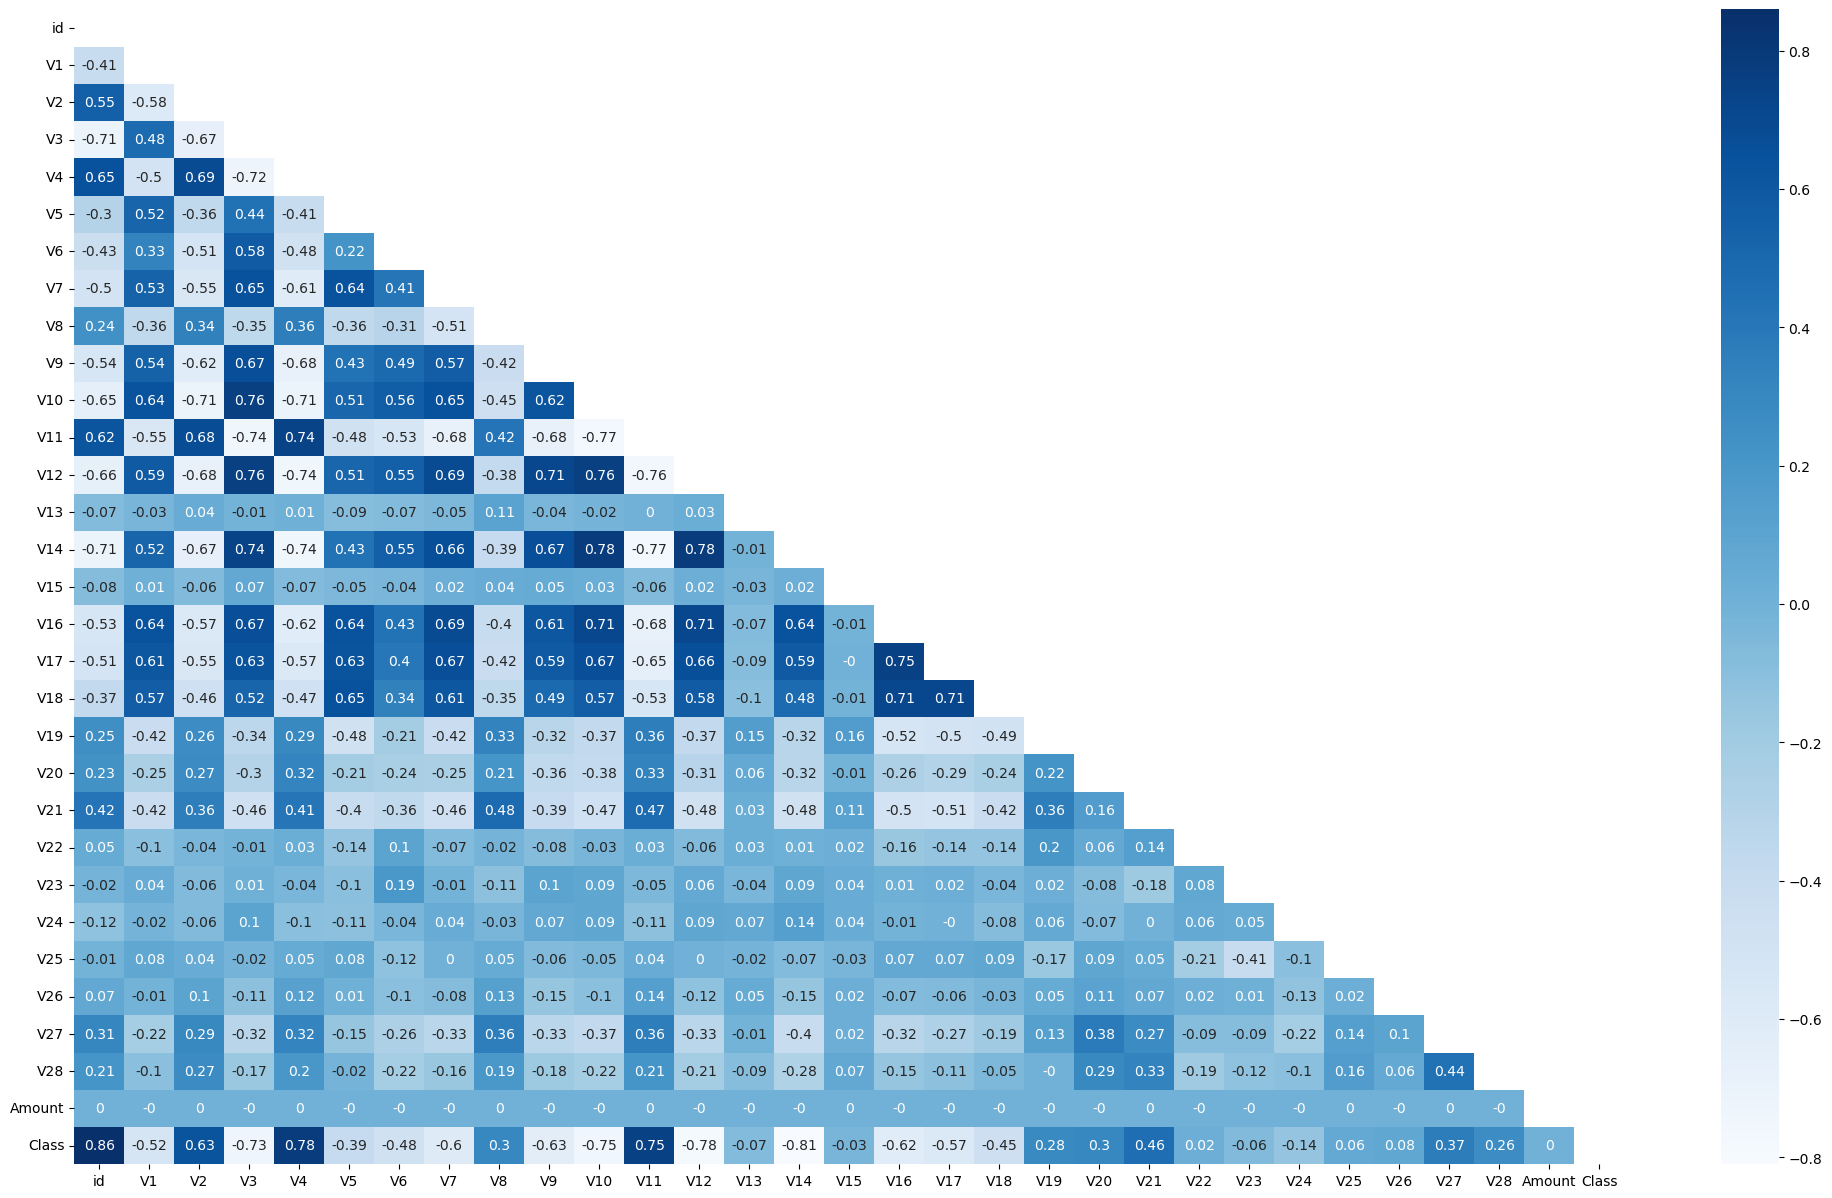

In [8]:
corr_df = data.corr(method = 'spearman').round(2)
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=[25,15])
sns.heatmap(corr_df, cmap=sns.color_palette("Blues", as_cmap = True), annot=True, mask = mask)
plt.savefig("plots/heatmap", dpi=300)
plt.show()

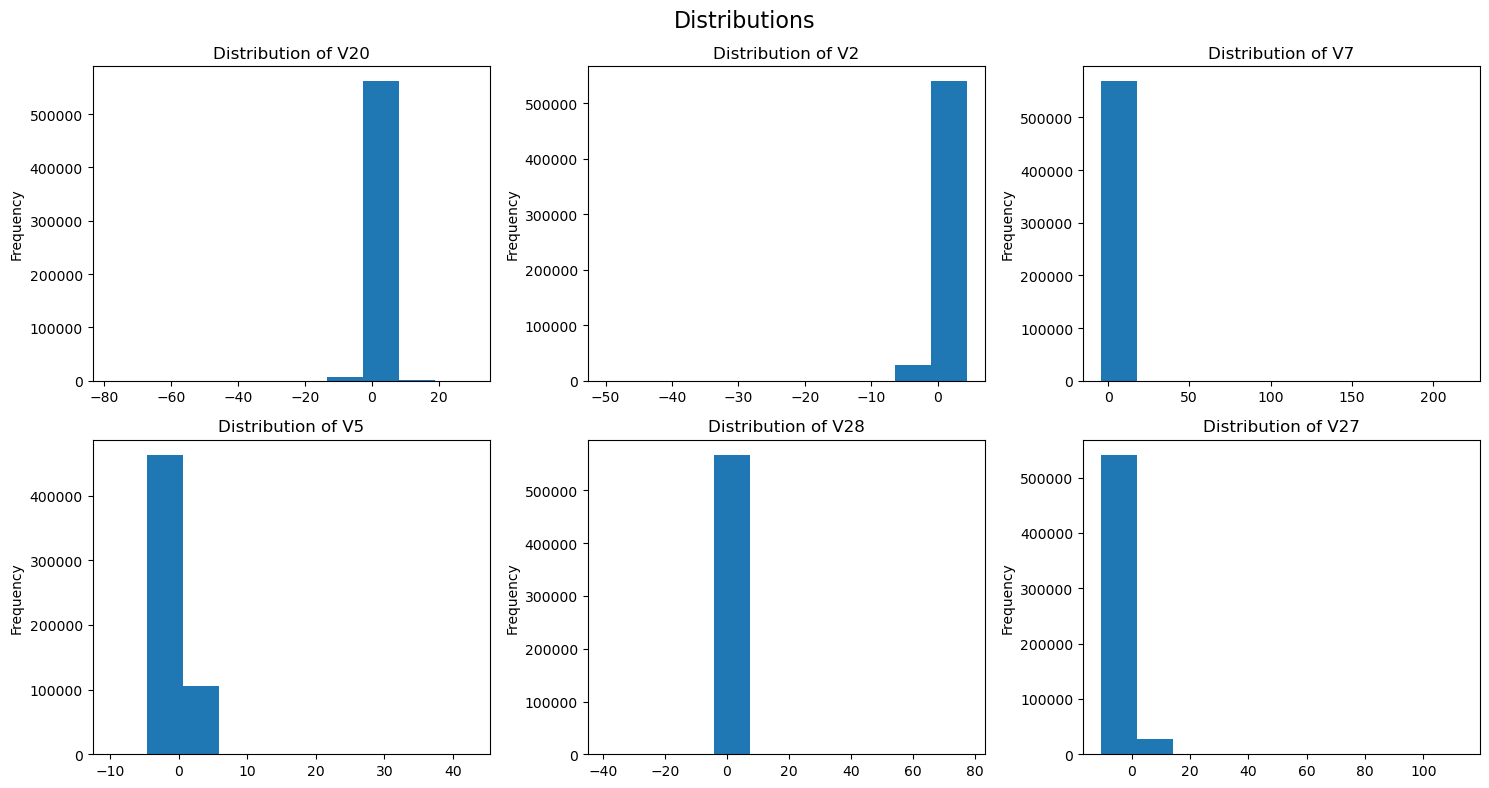

In [22]:
pfig, axes = plt.subplots(2, 3, figsize=(15, 8))
data['V20'].plot(kind='hist', ax=axes[0,0], title='Distribution of V20')
data['V2'].plot(kind='hist', ax=axes[0,1], title='Distribution of V2')
data['V7'].plot(kind='hist', ax=axes[0,2], title='Distribution of V7')
data['V5'].plot(kind='hist', ax=axes[1,0], title='Distribution of V5')
data['V28'].plot(kind='hist', ax=axes[1,1], title='Distribution of V28')
data['V27'].plot(kind='hist', ax=axes[1,2], title='Distribution of V27')
plt.suptitle('Distributions',size=16)
plt.tight_layout()
plt.savefig("plots/hists", dpi=300)
plt.show()

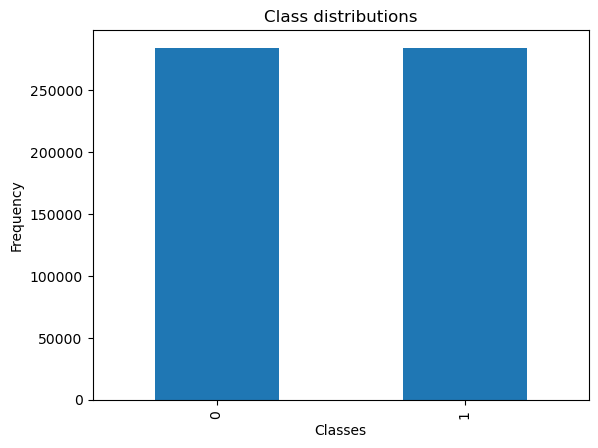

In [23]:
data["Class"].value_counts().plot(kind="bar")
plt.title("Class distributions")
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.savefig("plots/classes_bar", dpi=300)
plt.show()

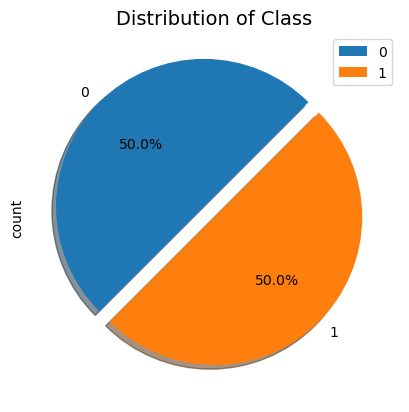

In [24]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.savefig("plots/classes_pie", dpi=300)
plt.show()

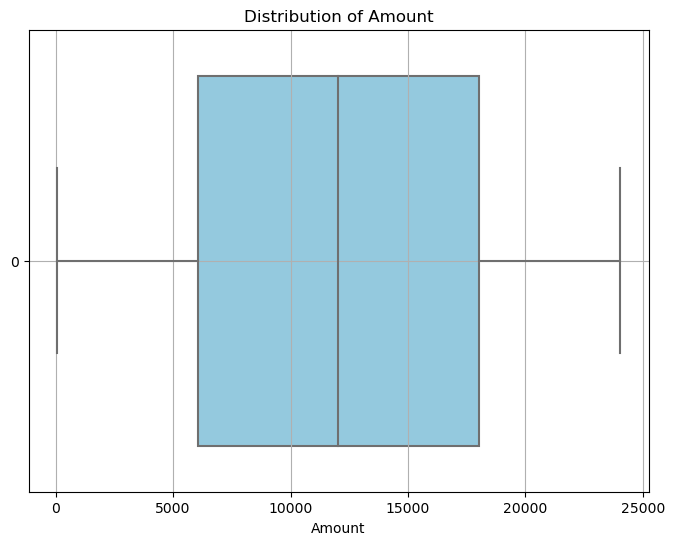

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Amount'], orient='h', color='skyblue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.grid(True)
plt.savefig("plots/amount", dpi=300)
plt.show()

## Data Preparation

In [27]:
X = data.drop(columns = ['Class','id'], axis=1)
y = data["Class"]

In [28]:
sc = StandardScaler()

In [29]:
X_scaled = sc.fit_transform(X) 

X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


## PCA

Decompose similar columns into components

In [30]:
pca = PCA(n_components = 12)
X_new = pd.DataFrame(pca.fit_transform(X_scaled), columns = ['Col_'+ str(i) for i in range(12)])
# pickle.dumps(open('pca.pkl', 'wb'), pca)
X_new.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11
0,2.190569,-0.164159,0.262976,0.911355,0.489160,-1.350064,-0.090408,-1.173610,-0.754207,-1.108059,0.220430,0.003323
1,2.085245,0.354907,0.169264,0.019844,0.122805,0.633547,-0.893277,0.286753,-0.294478,-0.332818,-0.670847,-0.286854
2,2.283198,-0.522377,-0.361704,0.380791,1.141815,-0.146487,-1.810828,0.293208,-1.545094,-1.242129,-1.796392,0.414395
3,2.694944,0.107476,-0.256086,-1.141510,-0.683588,1.159622,-0.829778,0.524075,-1.481065,0.368564,0.021393,-0.588839
4,2.048884,-0.354298,0.936463,0.978647,0.596611,0.899524,-0.767862,-1.032824,0.619281,0.608632,-0.320713,-0.305761


## Data Splitting

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_new, y, test_size=0.25, random_state=42, stratify= y)
cv = StratifiedKFold(n_splits = 8, shuffle = True)

In [32]:
print(f"shape of X train: {X_train.shape}, \t shape of y train: {y_train.shape}")
print(f"Shape of X test {X_test.shape}, \tshape of y test {y_test.shape}")


shape of X train: (426472, 12), 	 shape of y train: (426472,)
Shape of X test (142158, 12), 	shape of y test (142158,)


# ML

In [34]:

def train_evaluate(classifier_name, clf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Perform predictions
    y_pred = clf.predict(X_test)
    
    # Calculate probabilities for ROC curve
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    roc_auc = roc_auc_score(y_test, prob_pos)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc), color='skyblue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(classifier_name))
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig('plots/{}_ROC.png'.format(classifier_name), dpi=300)
    plt.show()
    plt.close()
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix - {}'.format(classifier_name))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('plots/{}_Confusion_Matrix.png'.format(classifier_name), dpi=300)
    plt.show()
    plt.close()
    
    # Plot classification report
    report = classification_report(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.text(0.1, 0.5, report, {'fontsize': 12}, fontfamily='monospace')
    plt.title('Classification Report - {}'.format(classifier_name))
    plt.axis('off')
    plt.savefig('plots/{}_Classification_Report.png'.format(classifier_name), dpi=300)
    plt.show()
    plt.close()
    print("CONFUSION MATRIX\n", confusion_matrix(y_test, y_pred))
    print("CLASSIFICATION REPORT\n", report)


## 1. Logistic Regression

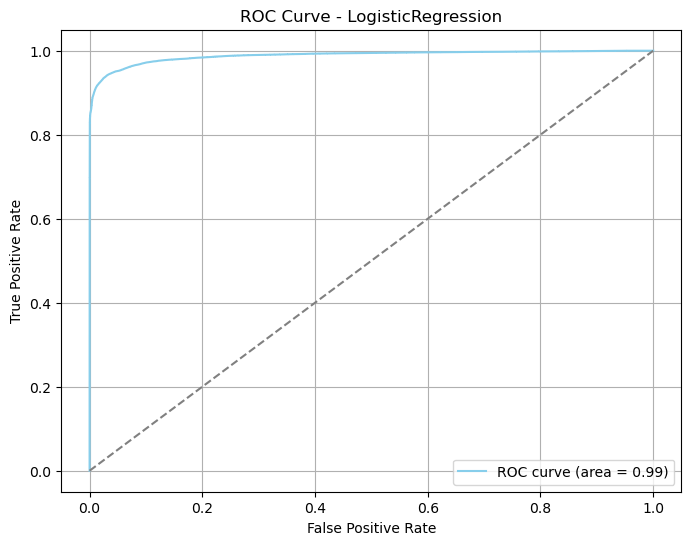

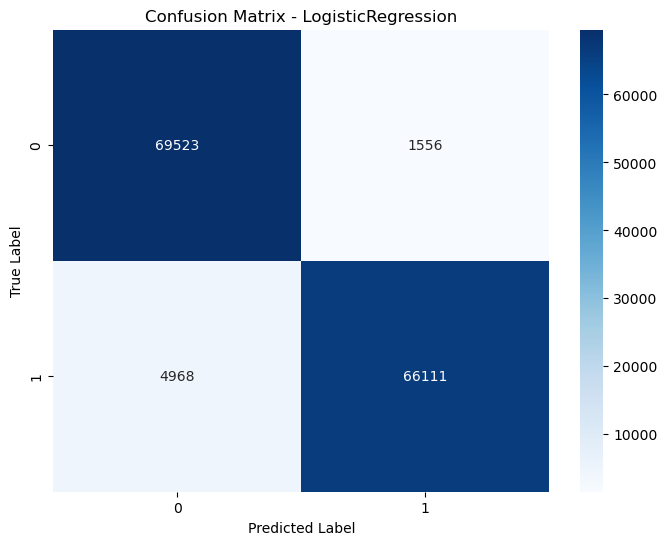

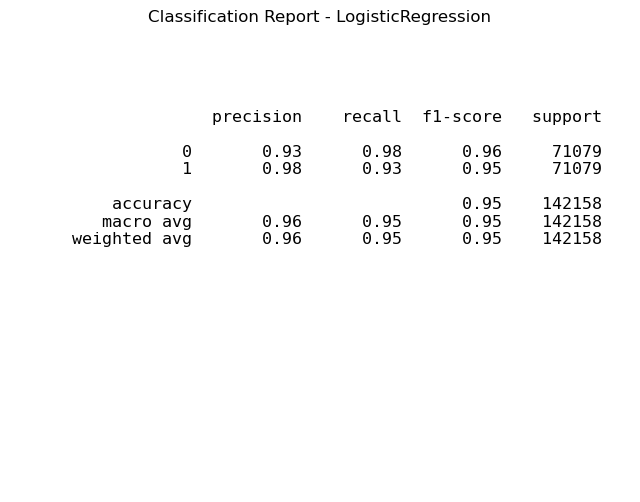

CONFUSION MATRIX
 [[69523  1556]
 [ 4968 66111]]
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     71079
           1       0.98      0.93      0.95     71079

    accuracy                           0.95    142158
   macro avg       0.96      0.95      0.95    142158
weighted avg       0.96      0.95      0.95    142158



In [41]:
model_lr = LogisticRegression()
train_evaluate("LogisticRegression", model_lr)

## 2. Decision Trees 

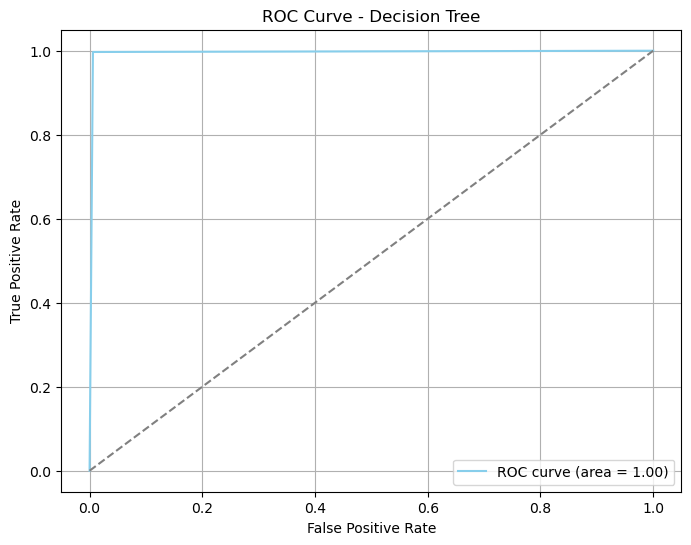

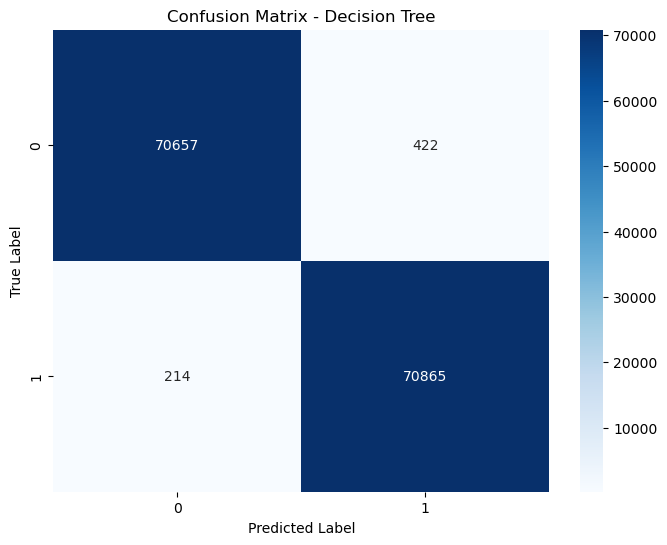

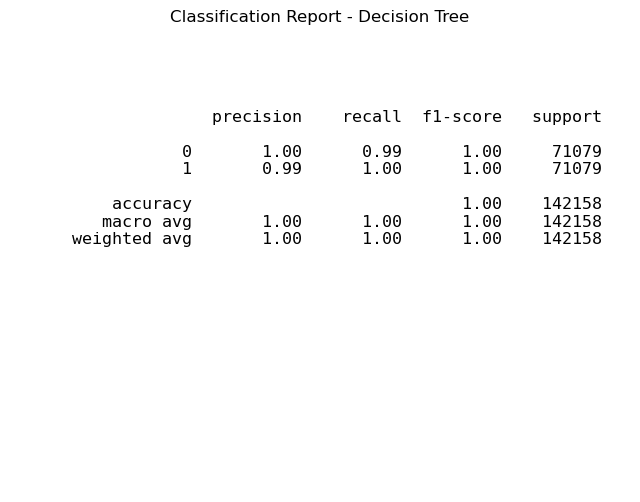

CONFUSION MATRIX
 [[70657   422]
 [  214 70865]]
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.99      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [36]:
model_dt = DecisionTreeClassifier()
train_evaluate("Decision Tree", model_dt)

## 3. SVM Classifier

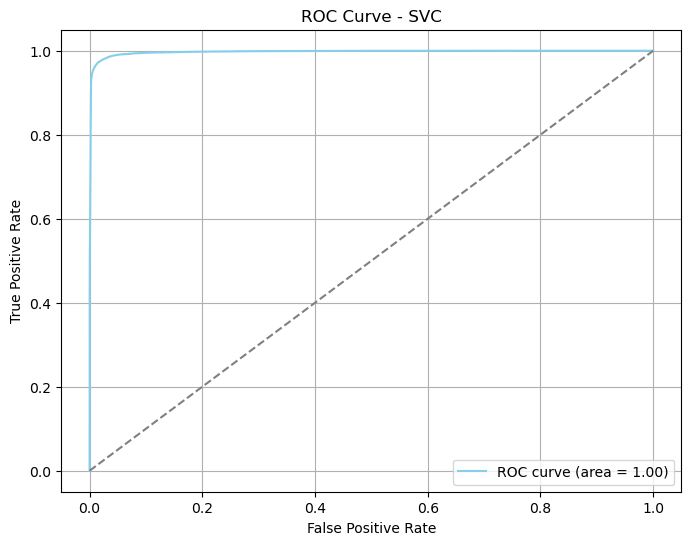

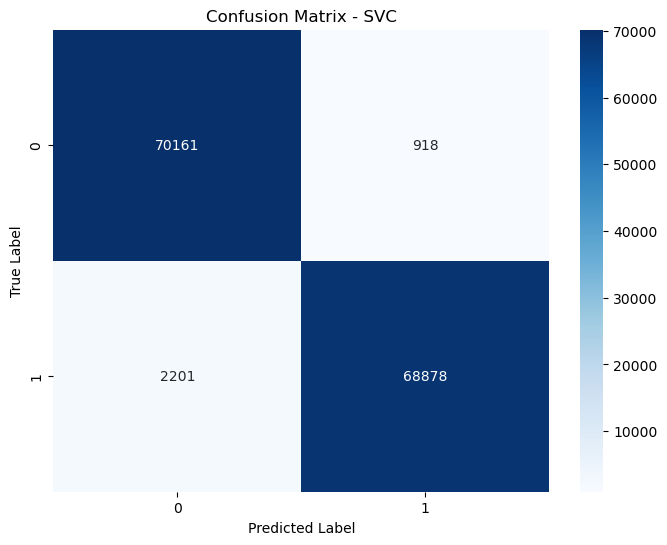

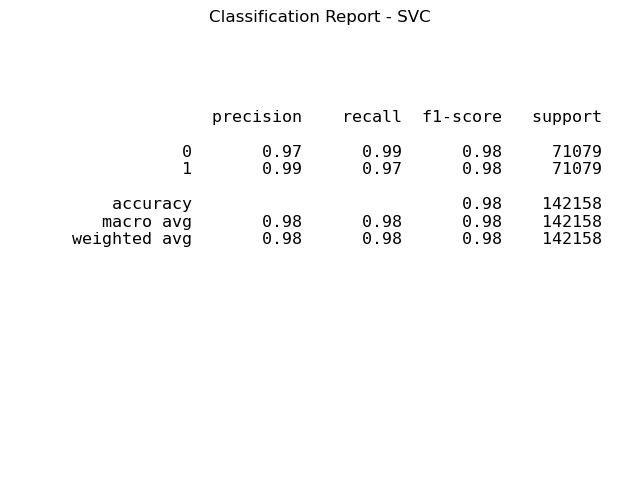

CONFUSION MATRIX
 [[70161   918]
 [ 2201 68878]]
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     71079
           1       0.99      0.97      0.98     71079

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158



In [37]:
model_svc = SVC()
train_evaluate("SVC", model_svc)

## 4. Random Forest

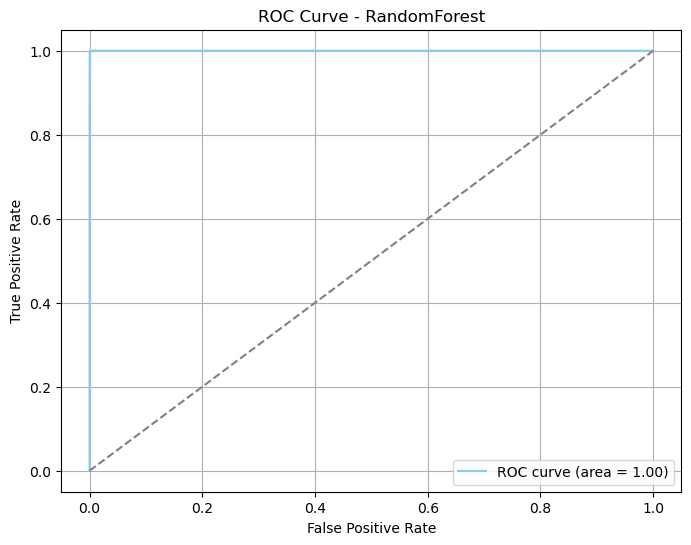

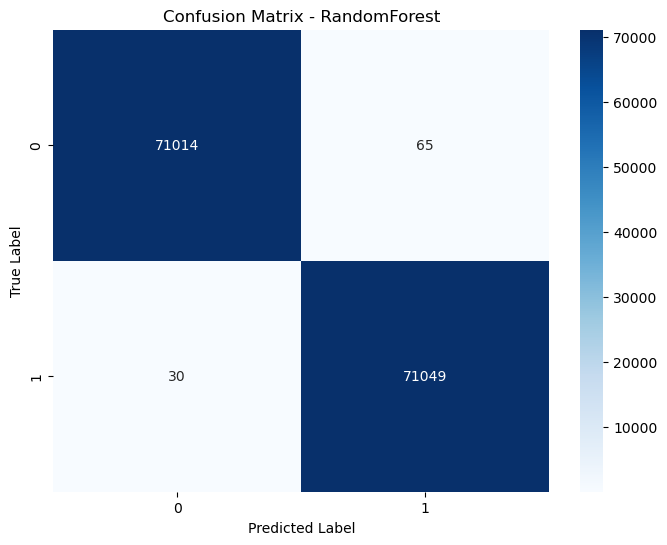

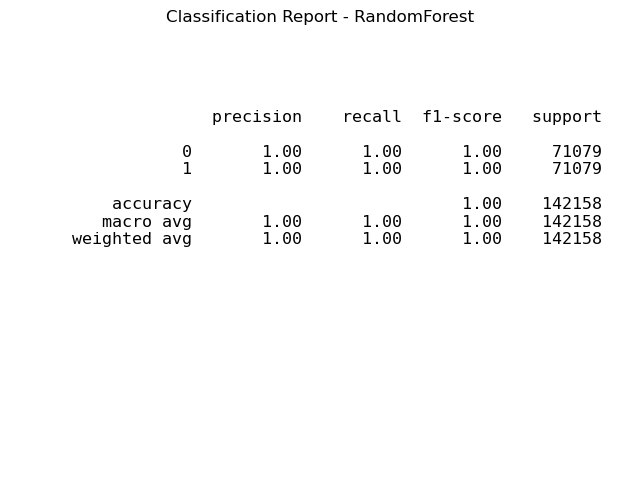

CONFUSION MATRIX
 [[71014    65]
 [   30 71049]]
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [38]:
model_rf = RandomForestClassifier()
train_evaluate("RandomForest", model_rf)